In [1]:
import os
os.chdir('..')
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:.4f}'.format)

def get_errors_plot(residuals):
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, color='blue', alpha=0.7)
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
    plt.legend()
    plt.show()

def get_residiuals_stats(residuals):
    res = residuals.describe()
    res['2.5%'] = residuals.quantile(0.025)
    res['97.5%'] = residuals.quantile(0.975)
    res['5%'] = residuals.quantile(0.05)
    res['95%'] = residuals.quantile(0.95)
    return res

In [2]:
X = pd.read_csv('csv\\data_for_modelling.csv', usecols = lambda col: col != 'price')
y = pd.read_csv('csv\\data_for_modelling.csv', usecols = ['price'])['price']

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 540}
Best score: -1073435815.7933743
count     5237.0000
mean      -316.3890
std      11519.1118
min     -75861.5079
25%      -5336.8827
50%      -1153.3514
75%       3323.6189
max      80599.7531
2.5%    -21771.9236
97.5%    27713.1298
Name: price, dtype: float64


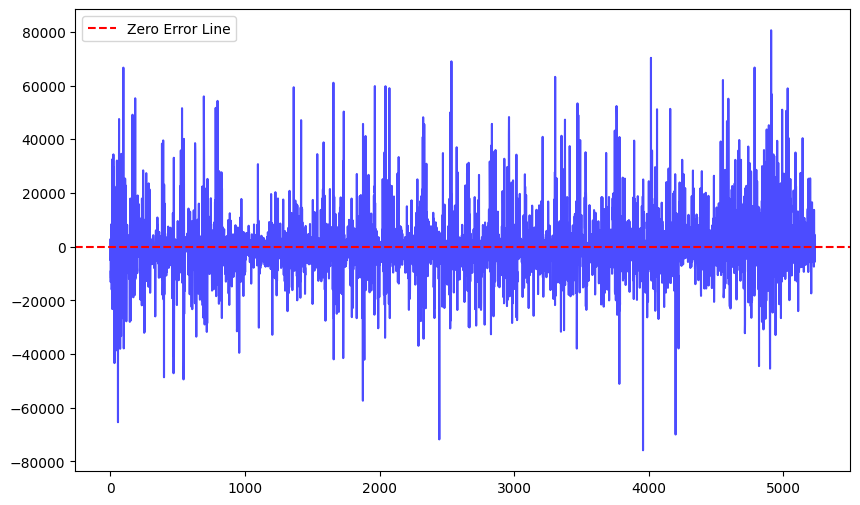

In [58]:
param_grid = {'n_estimators': [540], 
              'max_depth': [None],
              'min_samples_leaf': [1]
             }

grid_search = GridSearchCV(RandomForestRegressor(random_state = 228), 
                           param_grid, 
                           cv = 5,
                           verbose = 99,  
                           n_jobs = 5, 
                           scoring = 'neg_mean_squared_error'
              )

grid_search.fit(X, y)

residuals = y - grid_search.predict(X)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print(get_residiuals_stats(residuals))
get_errors_plot(residuals)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}
Best score: -1151433050.4801478
count   5237.0000
mean      -0.0000
std        7.1540
min      -39.9273
25%       -3.7393
50%        0.0807
75%        3.6710
max       45.6219
2.5%     -14.8484
97.5%     14.8251
Name: price, dtype: float64


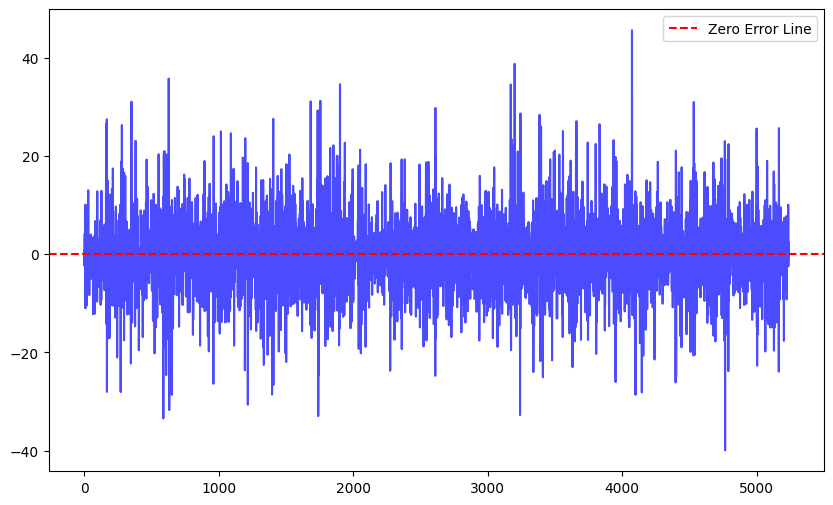

In [3]:
param_grid2 = {'n_estimators': [ 1000], 
              'learning_rate': [0.1],
              'max_depth': [10]
             }

grid_search2 = GridSearchCV(GradientBoostingRegressor(random_state = 228), 
                           param_grid2, 
                           cv = 5,
                           verbose = 99,  
                           n_jobs = 5, 
                           scoring = 'neg_mean_squared_error'
              )

grid_search2.fit(X, y)

residuals2 = y - grid_search2.predict(X)
print("Best parameters:", grid_search2.best_params_)
print("Best score:", grid_search2.best_score_)
print(get_residiuals_stats(residuals2))
get_errors_plot(residuals2)

In [50]:
filtered_cols = [x 
                 for x in X.columns 
                 if (1 == 1
                     and 'other_flats' not in x 
                    )
                ]

In [51]:
Xf = X[filtered_cols]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000}
Best score: -1168729181.046196
count   5237.0000
mean       0.0000
std        6.0539
min      -35.9452
25%       -3.1173
50%       -0.0549
75%        3.0338
max       57.5048
2.5%     -12.4131
97.5%     12.6654
Name: price, dtype: float64


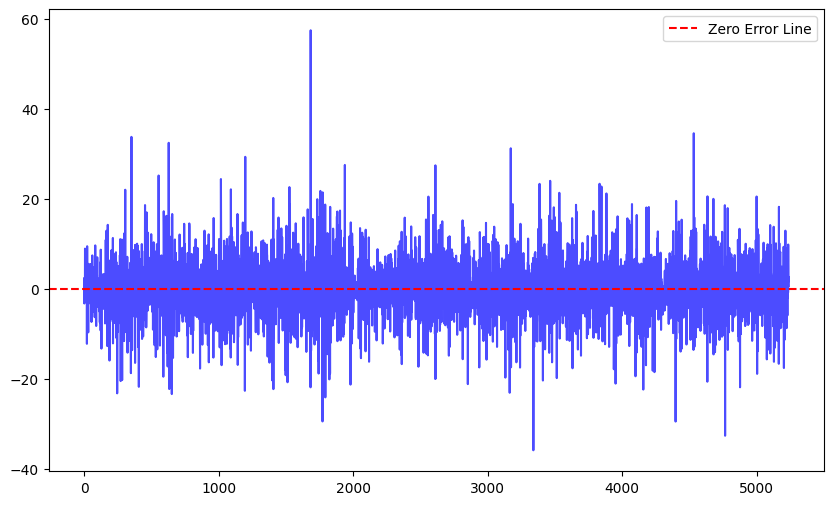

In [52]:
param_grid2 = {'n_estimators': [ 1000], 
              'learning_rate': [0.1],
              'max_depth': [10]
             }

grid_search2 = GridSearchCV(GradientBoostingRegressor(random_state = 228), 
                           param_grid2, 
                           cv = 5,
                           verbose = 99,  
                           n_jobs = 5, 
                           scoring = 'neg_mean_squared_error'
              )

grid_search2.fit(Xf, y)

residuals2 = y - grid_search2.predict(Xf)
print("Best parameters:", grid_search2.best_params_)
print("Best score:", grid_search2.best_score_)
print(get_residiuals_stats(residuals2))
get_errors_plot(residuals2)

In [55]:
Xf.columns

Index(['floor', 'floors_total', 'meters', 'center_dist',
       'adult_hospitals_closest_km', 'bus_stations_closest_km',
       'bus_stops_closest_km', 'bus_stops_less500m', 'bus_stops_0.5-1km',
       'bus_stops_1-3km', 'bus_stops_3-5km', 'eco_boiler_closest_km',
       'eco_dump_closest_km', 'eco_factory_closest_km',
       'eco_thermal_closest_km', 'eco_waste_closest_km', 'edu_prof_closest_km',
       'edu_prof_1-3km', 'edu_prof_3-5km', 'edu_school_closest_km',
       'edu_school_1-3km', 'edu_school_3-5km', 'kids_hospitals_closest_km',
       'moscow_stations_closest_km', 'moscow_stations_less500m',
       'moscow_stations_0.5-1km', 'moscow_stations_1-3km',
       'moscow_stations_3-5km', 'parks_closest_km', 'parks_less500m',
       'parks_0.5-1km', 'parks_1-3km', 'parks_3-5km', 'parks_area_less500m',
       'parks_area_0.5-1km', 'parks_area_1-3km', 'parks_area_3-5km',
       'shops_closest_km', 'shops_less500m', 'shops_0.5-1km', 'shops_1-3km',
       'shops_3-5km', 'train_stations_

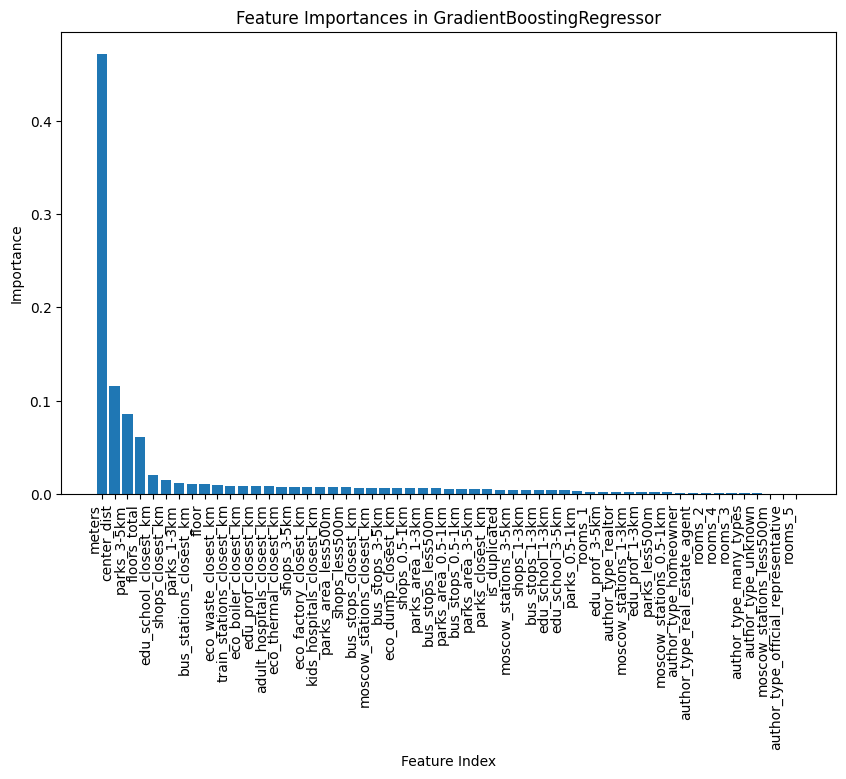

In [53]:
feature_importances = grid_search2.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance
sorted_feature_names = [Xf.columns [i] for i in indices]

plt.figure(figsize=(10, 6))
plt.bar(range(Xf.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90, ha="right")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances in GradientBoostingRegressor")
plt.show()

In [8]:
grid_search2.best_estimator_.feature_importances_

array([8.97206225e-03, 4.07971507e-02, 4.63983240e-01, 2.02278338e-02,
       6.00284372e-03, 7.03527017e-03, 4.98879860e-03, 4.86996843e-03,
       5.94605220e-03, 2.58528415e-03, 6.29564376e-03, 4.19492464e-03,
       8.73728930e-03, 5.26154266e-03, 5.99335205e-03, 6.36632871e-03,
       7.39886893e-03, 2.39226171e-03, 1.09927248e-03, 1.96533759e-02,
       3.70435845e-03, 2.78775726e-03, 1.09510833e-02, 4.31974524e-03,
       5.18366530e-04, 9.24976302e-04, 2.91648836e-03, 5.25123583e-03,
       5.55450736e-03, 5.90826974e-03, 9.12365423e-02, 1.13290127e-01,
       6.69356857e-03, 1.43994927e-03, 1.97577869e-03, 9.61490645e-03,
       8.80903189e-03, 6.44936925e-03, 3.37475658e-03, 4.89963681e-03,
       5.11910532e-03, 1.29056627e-02, 4.38031603e-03, 8.12628530e-03,
       4.68089277e-03, 7.95909545e-03, 4.11554812e-03, 3.55162087e-03,
       1.32176535e-02, 2.18819162e-03, 1.02971019e-03, 1.50079723e-04,
       1.53385223e-03, 1.26170105e-03, 5.62806903e-04, 2.33381268e-03,
      

count        99.0000
mean      34384.6497
std       61541.9286
min     -118433.4565
25%       -5404.4082
50%       27067.0375
75%       77140.5900
max      199942.0217
2.5%     -74365.6437
97.5%    150506.4507
Name: price, dtype: float64


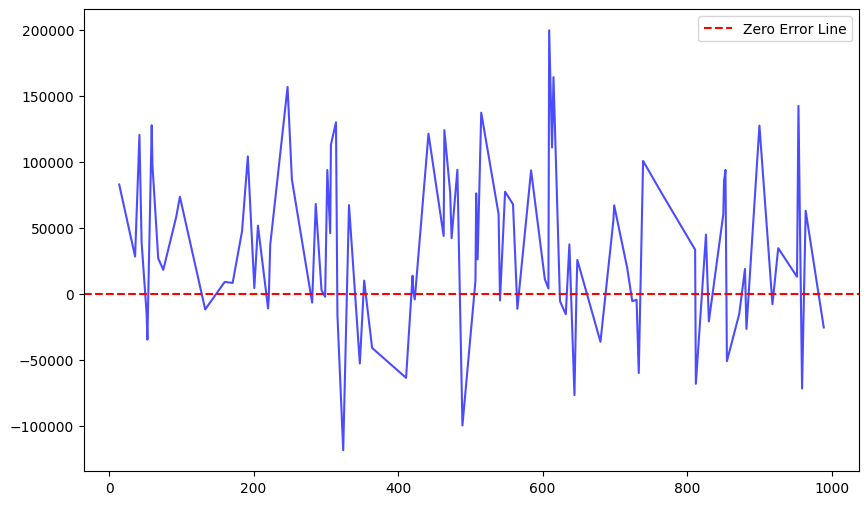

In [99]:
holdout = pd.read_csv('csv\\holdout.csv').query('price > 200_000 ')
X2 = holdout.drop(['price'], axis = 1)[filtered_cols]
y2 = holdout['price']
print(get_residiuals_stats(y2 - grid_search2.predict(X2)))
get_errors_plot(y2 - grid_search2.predict(X2))

In [92]:
y2 - grid_search2.predict(X2)

0      -3871.4088
1      -9993.8694
2       2406.4498
3       4208.7678
4      -5098.3025
          ...    
993    -3458.3905
996    -8279.1672
997   -47868.3498
998    27502.2136
999   -22854.2625
Name: price, Length: 602, dtype: float64

In [84]:
holdout['price'].min()

np.float64(103330.0)

In [72]:
((y2 - grid_search2.predict(X2)).quantile(0.1), (y2 - grid_search2.predict(X2)).quantile(0.9))

(np.float64(-35561.70537064881), np.float64(29126.700091818653))

count      1000.0000
mean      -1430.6160
std       32274.0013
min     -125682.9858
25%      -15859.3409
50%       -3720.1515
75%        8608.7532
max      183819.9949
2.5%     -64589.5754
97.5%     81395.7991
Name: price, dtype: float64


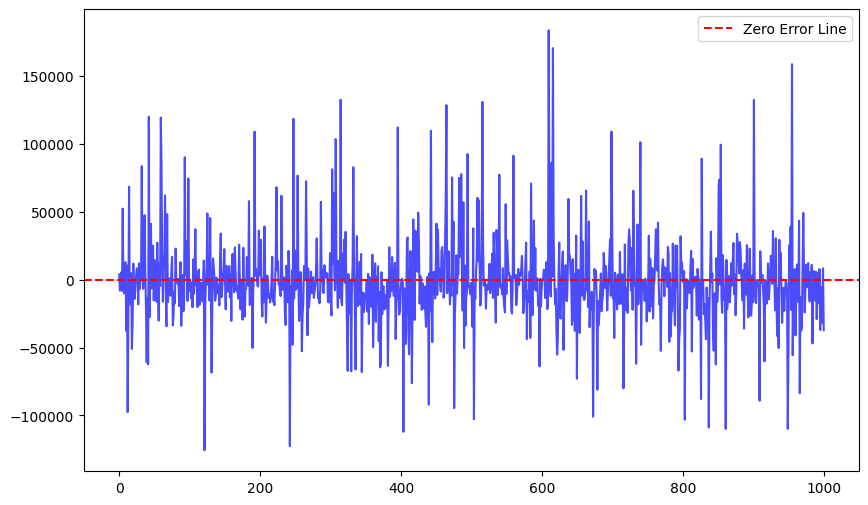

In [67]:
X2 = pd.read_csv('csv\\holdout.csv', usecols = lambda col: col != 'price')
print(get_residiuals_stats(y2 - grid_search.predict(X2)))
get_errors_plot(y2 - grid_search.predict(X2))

In [66]:
res = np.abs((y2 - grid_search2.predict(X2))/y2)*100
print(get_residiuals_stats(res))
get_errors_plot(res)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- other_flats_0.5-1km
- other_flats_1-3km
- other_flats_3-5km
- other_flats_at_this_coords
- other_flats_less500m


count   1000.0000
mean      19.4586
std       23.4594
min        0.0220
25%        6.5147
50%       14.2113
75%       25.2668
max      344.0088
2.5%       0.6375
97.5%     62.3755
Name: price, dtype: float64


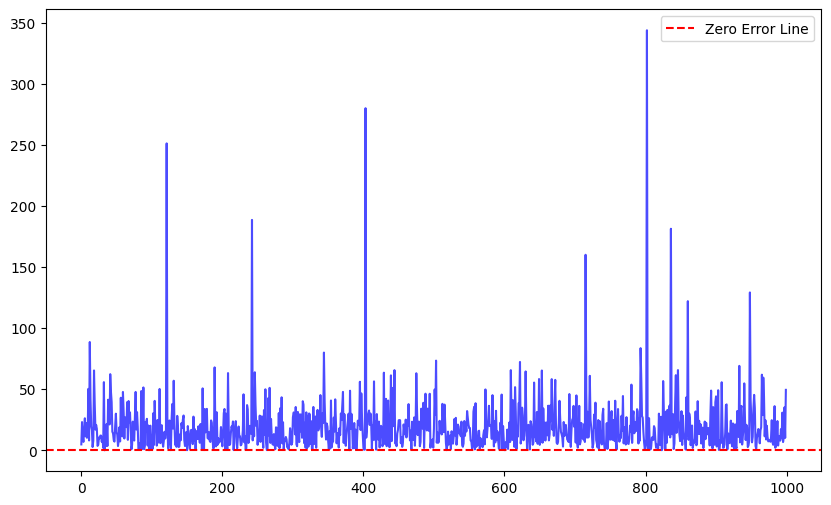

In [60]:
res = np.abs((y2 - grid_search.predict(X2))/y2)*100
print(get_residiuals_stats(res))
get_errors_plot(res)

In [65]:
np.quantile(res, 0.8)

np.float64(29.221429848171162)

In [45]:
np.quantile(res, 0.05)

np.float64(1.0098550366262116)